<a href="https://colab.research.google.com/github/iremyuvali/graduation-thesis/blob/main/iremyuvali_graduation_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CEN348 - GRADUATION THESIS
# DATA ANALYSES BY USING OPTIMIZATION ALGORITHMS 

irem yuvali 2017555071


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# The Iris Data

In [ ]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris_data=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.shape

(150, 4)

In [ ]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
x, y = iris.data, iris.target

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dict(enumerate(iris.target_names))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [ ]:
species = dict(enumerate(iris.target_names))
iris_data['Species'] = iris.target
print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Species  
0          0

In [ ]:
iris_data.Species = iris_data.Species.replace({0:'setosa', 1:'versicolor', 2:'virginica'})
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


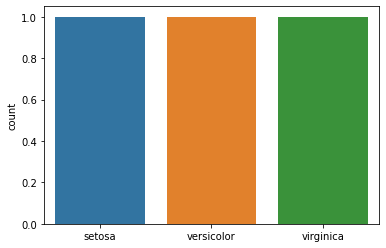

In [ ]:
import seaborn as sns
sns.countplot(iris.target_names,label="Count")
plt.show()

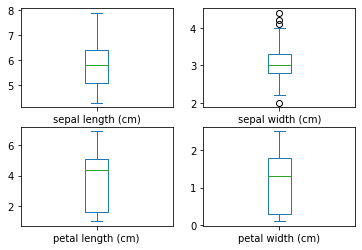

In [ ]:
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

<function matplotlib.pyplot.show>

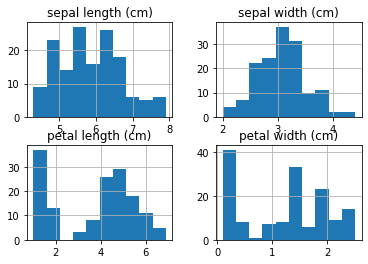

In [ ]:
iris_data.hist()
plt.show

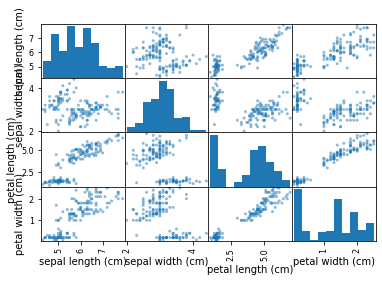

In [ ]:
pd.plotting.scatter_matrix(iris_data)
plt.show()

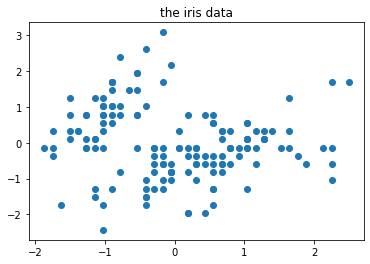

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.title("the iris data")
plt.show()

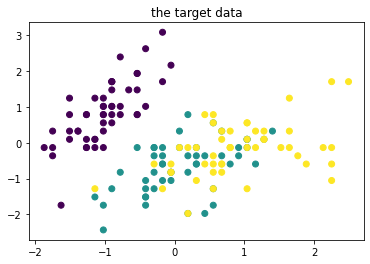

In [ ]:
plt.scatter(x[:,0],x[:,1],c=iris.target)
plt.title("the target data")
plt.show()

# Standart KMeans

In [ ]:
iris_ = pd.DataFrame(iris.data)

In [ ]:
km_model = KMeans(n_clusters=3)
km = km_model.fit(iris_)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

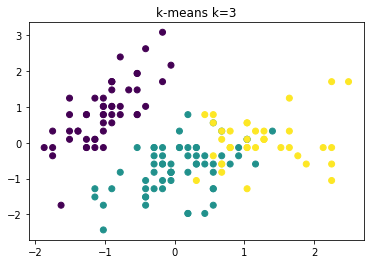

In [ ]:
plt.scatter(x[:,0],x[:,1],c=km.labels_)
plt.title("k-means k=3")
plt.show()

In [ ]:
acc_km = accuracy_score(iris.target, km.labels_)
print(acc_km)

0.8933333333333333


# FireFly Optimization Algorithm

In [ ]:
pip install pysort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
 # alpha_n=alpha_0(1-delta)^NGen=10^(-4);
 # alpha_0=0.9

In [ ]:
def alpha_new(alpha, NGen):
   
    delta = 1 - (10 ** (-4) / 0.9) ** (1 / NGen)
    alpha = (1 - delta) * alpha
    return alpha

In [ ]:
    ### parameters ###

    # n=50 #number of fireflies
    # dim=30 #dimension
    # lb=-50
    # ub=50
    # MaxGeneration=10

In [ ]:
def FFA(X_train,X_test,y_train,y_test, lb, ub, dim, n, MaxGeneration):


    # FFA parameters
    alpha = 0.5  # Randomness 0--1 (highly random)
    betamin = 0.20  # minimum value of beta
    gamma = 1  # Absorption coefficient
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    zn = np.ones(n)
    zn.fill(float("inf"))

    #ns(i,:)=Lb+(Ub-Lb).*rand(1,d);
    ns = np.zeros((n, dim))
    for i in range(dim):
        ns[:, i] = np.random.uniform(0, 1, n) * (ub[i] - lb[i]) + lb[i]
    Lightn = np.ones(n)
    Lightn.fill(float("inf"))

    #[ns,Lightn]=init_ffa(n,d,Lb,Ub,u0)
    
    convergence = []
    iterations = []
    accuracy = []
    array = []
    
    # Main loop
    t = 0 
    while t < MaxGeneration:
        for k in range(0, MaxGeneration):  #start iterations

            #This line of reducing alpha is optional
            alpha = alpha_new(alpha, MaxGeneration)
        
            kmeans = KMeans(n_clusters = i).fit(X_train,y_train)
            cv = KFold(n_splits = 10, shuffle = True, random_state = 15)
            cv_accuracies = cross_val_score(kmeans,  X_test, y_test, cv = cv,scoring = 'accuracy')


            accuracies = cv_accuracies.mean()            
            fitness_value = (1 - accuracies) * 100
            
            
            #Evaluate new solutions (for all n fireflies)
            for i in range(0, n):
                zn[i] = kmeans.predict(ns[i, :].reshape(1,-1))
                Lightn[i] = zn[i]

            #Ranking fireflies by their light intensity/objectives

            Lightn = np.sort(zn)
            Index = np.argsort(zn)
            ns = ns[Index, :]

            #Find the current best
            nso = ns
            Lighto = Lightn
            nbest = ns[0, :]
            Lightbest = Lightn[0]

            #% For output only
            fbest = Lightbest
            convergence.append(fbest)
            array.append((100-fbest)/100)

            #Move all fireflies to the better locations
            #  [ns]=ffa_move(n,d,ns,Lightn,nso,Lighto,nbest,...
            #    Lightbest,alpha,betamin,gamma,Lb,Ub);
            scale = []
            for b in range(dim):
                scale.append(abs(ub[b] - lb[b]))
            scale = np.array(scale)
            for i in range(0, n):
                #The attractiveness parameter beta=exp(-gamma*r)
                for j in range(0, n):
                    r = np.sqrt(np.sum((ns[i, :] - ns[j, :]) ** 2))
                    #r=1
                    #Update moves
                    if Lightn[i] > Lighto[j]:  #Brighter and more attractive
                        beta0 = 1
                        beta = (beta0 - betamin) * math.exp(-gamma * r ** 2) + betamin
                        tmpf = alpha * (np.random.rand(dim) - 0.5) * scale
                        ns[i, :] = ns[i, :] * (1 - beta) + nso[j, :] * beta + tmpf

        #ns=np.clip(ns, lb, ub)
        t = t + 1
        iterations.append(t)
        accuracy.append((100-fbest)/100)
        

        IterationNumber = k
        BestQuality = fbest

        #if IterationNumber % 1 == 0:
        #print(["At iteration " + str(k) + " the best fitness is " + str(BestQuality)])
        #print('accuracy:',((100 - fbest) / 100))
        
        newArray = []
        newArray = array

        import sorting_techniques.pysort as pys
        sortObj = pys.Sorting()
        sortResult = sortObj.bubbleSort(newArray)

        print(sortResult) 
        
        if array[k] == sortResult[-1]:

            print("At iteration is: " + str(k+1) , "the best fitness is " + str(BestQuality))
            print('accuracy:',sortResult[-1])
            break 
        else:
            print(array[k], sortResult[-1])

    return IterationNumber,BestQuality,sortResult[-1]


# Optimized Version

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
x = iris_data.drop('Species', axis=1)
y = iris_data.Species

In [ ]:
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

IterationNumber, BestQuality, accuracy = FFA(x_train, x_test, y_train, y_test, -50, 50, 4, 50, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 111, in _check_targets
    unique_values = np.union1d(y_true, y_pred)
  File "<__array_function__ internals>", line 6, in union1d
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py", line 777, in union1d
    return unique(np.concatenate((ar1, ar2), axis=None))
  File "<__array_function__ internals>", line 6, in unique
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py", line 272, in unique
    ret = _unique1d(ar, return_index, return_inverse, return_counts)
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py", line 333, in _unique1d
    ar.sort()
TypeError: '<' not supported between instances of 'int' and

[0.87, 0.87, 0.89, 0.89, 0.92, 0.92, 0.93, 0.95, 0.98, 1.0]
At iteration is: 10 the best fitness is 11.0
accuracy: 1.0


*At iteration is: **10** 
the best fitness is **11.0**
accuracy: 1.0*

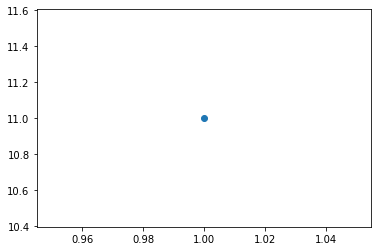

In [ ]:
plt.scatter(accuracy, BestQuality)